# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [40]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np

  
# Create two new dataframes
north_df= pd.read_csv(r"C:\Users\LC Harrison Sand\OneDrive\Documents\LaunchCode\call-center-cleanup-assignment\NorthCallCenter.csv")
south_df = pd.read_csv(r"C:\Users\LC Harrison Sand\OneDrive\Documents\LaunchCode\call-center-cleanup-assignment\SouthCallCenter.csv")




## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [41]:
north_df.head(10)
display(north_df.columns)
display(north_df.isna().sum())
display(north_df.nunique())
unique_reps = north_df["Rep ID"].nunique()


# EDA Question 1A solution below:
print(f"There are {unique_reps} unique reps in the North Branch")
#There are 9 unique reps in the North Branch.

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

Unnamed: 0               245
Branch                     1
Call Purpose               3
Time Block                 9
Incoming or Outgoing       2
Queue                      2
Rep ID                     9
Sale                       3
Lost Call                  2
Abandoned                  2
Busy Minutes               5
Not Ready Minutes          3
Incoming Wait Time         5
During Call Wait Time      3
Calls                      1
dtype: int64

There are 9 unique reps in the North Branch


#### EDA Question 1B:  How many reps are in the South branch?  

In [42]:
south_df.head(10)
display(south_df.columns)
display(south_df.isna().sum())
display(south_df.nunique())
unique_reps = south_df["Rep ID"].nunique()

# EDA Question 1B solution below:
print(f"There are {unique_reps} unique reps in the North Branch")
#There are 11 unique reps in the North Branch.

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

Unnamed: 0               314
Branch                     1
Call Purpose               3
Time Block                 9
Incoming or Outgoing       2
Queue                      2
Rep ID                    11
Sale                       2
Lost Call                  2
Abandoned                  2
Busy Minutes               5
Not Ready Minutes          3
Incoming Wait Time         5
During Call Wait Time      3
Calls                      1
dtype: int64

There are 11 unique reps in the North Branch


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [43]:

n_avg_busy_minutes = north_df['Busy Minutes'].mean()
n_avg_not_ready = north_df['Not Ready Minutes'].mean()
n_avg_inc_wait = north_df['Incoming Wait Time'].mean()
n_avg_dur_call = north_df['During Call Wait Time'].mean()

print(f"Avg Busy Minutes: {n_avg_busy_minutes:.2f}, Avg Not Ready Minutes: {n_avg_not_ready:.2f}, Avg Incoming Wait Time: {n_avg_inc_wait:.2f}, Avg During Call Wait Time: {n_avg_dur_call:.2f}")

# EDA Question 2A solution Below:
'''
For North Branch:
Average Busy Minutes: 9.99 Minutes
Average Not Ready Minutes: 1.91 Minutes
Average Incoming Wait Time: 3.05 Minutes
Average During Call Wait Time: 2.97 Minutes

'''

Avg Busy Minutes: 9.99, Avg Not Ready Minutes: 1.91, Avg Incoming Wait Time: 3.05, Avg During Call Wait Time: 2.97


'\nFor North Branch:\nAverage Busy Minutes: 9.99 Minutes\nAverage Not Ready Minutes: 1.91 Minutes\nAverage Incoming Wait Time: 3.05 Minutes\nAverage During Call Wait Time: 2.97 Minutes\n\n'

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [44]:

s_avg_busy_minutes = south_df['Busy Minutes'].mean()
s_avg_not_ready = south_df['Not Ready Minutes'].mean()
s_avg_inc_wait = south_df['Incoming Wait Time'].mean()
s_avg_dur_call = south_df['During Call Wait Time'].mean()

print(f"Avg Busy Minutes: {s_avg_busy_minutes:.2f}, Avg Not Ready Minutes: {s_avg_not_ready:.2f}, Avg Incoming Wait Time: {s_avg_inc_wait:.2f}, Avg During Call Wait Time: {s_avg_dur_call:.2f}")

# EDA Question 2A solution Below:
"""
For South Branch:
Average Busy Minutes: 10.05 Minutes
Average Not Ready Minutes: 1.91 Minutes
Average Incoming Wait Time: 3.00 Minutes
Average During Call Wait Time: 3.08 Minutes
"""
# EDA Question 2B solution Below:


Avg Busy Minutes: 10.05, Avg Not Ready Minutes: 1.91, Avg Incoming Wait Time: 3.00, Avg During Call Wait Time: 3.08


'\nFor South Branch:\nAverage Busy Minutes: 10.05 Minutes\nAverage Not Ready Minutes: 1.91 Minutes\nAverage Incoming Wait Time: 3.00 Minutes\nAverage During Call Wait Time: 3.08 Minutes\n'

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [45]:
# EDA Question 3 solution Below:
n_and_s = pd.concat([north_df, south_df])

time_blocks = n_and_s.groupby(['Time Block']).count()
time_blocks['Branch']
"""
Time Block
9:00 AM      10
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
"""

'\nTime Block\n9:00 AM      10\n10:00 AM     99\n11:00 AM     56\n12:00 PM    120\n1:00 PM      40\n2:00 PM      65\n3:00 PM      73\n4:00 PM      53\n5:00 PM      43\n'

##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes =   9.99 Minutes
> - Not Ready Minutes = 1.91 Minutes
> - Incoming Wait Time = 3.05 Minutes
> - During Call Wait Time = 2.97 Minutes
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05 Minutes
> - Not Ready Minutes = 1.91 Minutes
> - Incoming Wait Time = 3.00 Minutes
> - During Call Wait Time = 3.08 Minutes
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43

## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [46]:
# Question 1 solution below
display(north_df.isnull().sum())
display(south_df.isnull().sum())
display(north_df["Incoming Wait Time"].shape)
display(north_df["Incoming Wait Time"].shape)
display(north_df["Incoming Wait Time"].min())
display(north_df["Incoming Wait Time"].min())



Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

(245,)

(245,)

np.float64(1.0)

np.float64(1.0)

#### Record your answer below:

> Your Answer: There are 163 rows in the North Data Frame that are missing Incoming Wait Time values and 188 row in the South Data Frame that are missing Incoming wait times.

From looking at the data it appears that Outgoing calls do not have a wait time, since they are outgoing calls. If I needed to work with both outgoing and incoming calls, I would keep the missing values at a null value, since we do not want to set them as another number and change any statistical data, additionally setting them as strings could impact some analysis.



#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [47]:
# Cleaning Question 2 solution below:
# sales = north_df["Sale"].unique()
# sales
 #One "Yes " has a trailing space, the other does not.

north_df["Sale"] = north_df["Sale"].str.strip() #This is a way to stip leading and trailing spaces
sales = north_df["Sale"].unique() #I'm using this to test if it worked.
sales
#Now there are no trailing spaces.

array(['NO', 'YES'], dtype=object)

##### Record your answer by below:
> Your Answer: There were three types of unique values in the column: "NO", "YES ", and "YES". One of the "YES" had a trailing space. Python would have treated these as two different values. I took the series and using a string and strip function I removed leading and trailing spaces from the series and then saved it over top the old sereies, fixing the problem.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [48]:
# Cleaning Question 3 solution below:
north_duplicate_rows = north_df.duplicated()
south_duplicate_rows = south_df.duplicated()
n_and_s_duplicated_rows = n_and_s.duplicated()

display(north_duplicate_rows.sum()) #I'm using .sum() to count the number of Trues, since True will sum as 1 and False as 0.
display(south_duplicate_rows.sum())
display(n_and_s_duplicated_rows.sum())

#There are no duplicates in each data set or the combined dataset.

np.int64(0)

np.int64(0)

np.int64(0)

##### Record your answer below:
> Your Answer: #There are no duplicates in each data set or the combined dataset. If there were I could use the function DataFrame.drop_duplicates(inplace=True). I would do inplace = True to update the original DataFrame.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [49]:
# Cleaning Question 4 solution below:
# north_df.head(10)
# north_df.tail(10)
# north_df.shape
# north_df["Calls"].sum()
# south_df.head(10)
# south_df.tail(10)
# south_df["Queue"].sum()
# south_df.shape

# north_df.drop(columns="Calls", inplace=True) #Drop the call column
# south_df.drop(columns="Calls", inplace=True)

#The Queue column seems unecessary for what we are doing, however more information about how queues are handled could help us make that decision. I would drop the column with .drop

##### Record your answer below:
> Your Answer: The Queue column seems unecessary for what we are doing, however more information about how queues are handled could help us make that decision. I would drop the column with .drop

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [50]:
# Create dataframe for the entire company named df
df= pd.concat([north_df, south_df])


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [51]:
# Manipulation Question solution below:
reps = df.groupby("Rep ID").sum()

sorted_reps = reps[['Branch', 'Calls']].sort_values(['Branch', 'Calls'], ascending=False)
sorted_reps

,Branch,Calls
Rep ID,,
Eric,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,35
Randy,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,33
Sandy,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,32
Helga,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,31
George,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,29
Kate,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,29
Karl,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,28
Josh,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,26
Susan,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,26


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent with 37
- South Branch = Eric with 35

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [52]:
# Manipulation Question 2 solution below:
centers = [north_df, south_df, df]
branches = ['North', 'South', 'Combined'] 
i=-1 #This helps me with the naming of the branch and will be used to go through the branches list. I set at -1, so 0 would be the first number when +=1.

for center in centers: #I decided to use a for loop to both challenge myself and make it so I'm not just writing the same code three times in a row.
    total_calls = center['Calls'].sum()
    aband_calls = center['Abandoned'].sum()
    aban_rate = (aband_calls/total_calls) * 100
    i += 1
    print(f"The {branches[i]} Branch Call Abandonment rate is {aban_rate: .2f}%.") #This tests if the rate is optimal and prints message based on result.
    if aban_rate > 2 and aban_rate < 5:
        print('This rate is optimal')
    else:
        print("This rate is NOT optimal.")
    


The North Branch Call Abandonment rate is  2.86%.
This rate is optimal
The South Branch Call Abandonment rate is  1.27%.
This rate is NOT optimal.
The Combined Branch Call Abandonment rate is  1.97%.
This rate is NOT optimal.


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? Yes, the South Branch and Combined Branches.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [53]:
# Manipulation Question 3 solution below:

centers = [north_df, south_df, df]
branches = ['North', 'South', 'Combined'] 
i=-1 #This helps me with the naming of the branch and will be used to go through the branches list. I set at -1, so 0 would be the first number when +=1.

for center in centers:
    ideal_time = center.loc[center["Incoming Wait Time"] <= 2].shape[0] #I used .shape, since this will give me one value while count would give me multiple in the form of a series. Had to look this up!
    non_ideal_time = center.loc[center["Incoming Wait Time"] > 2].shape[0]
    ideal_percent = (ideal_time/(ideal_time + non_ideal_time))*100
    i+=1
    print(f"The percentage of call answered in 2 seconds or less from {branches[i]} branch is {ideal_percent: .2f}% with {ideal_time} ideal timed calls.")


The percentage of call answered in 2 seconds or less from North branch is  40.24% with 33 ideal timed calls.
The percentage of call answered in 2 seconds or less from South branch is  38.10% with 48 ideal timed calls.
The percentage of call answered in 2 seconds or less from Combined branch is  38.94% with 81 ideal timed calls.


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% with 33 ideal calls
- South Branch = 38.10% with 48 ideal calls
- Company Wide = 38.94% with 81 ideal calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [54]:
# Manipulation Question 4 solution below:
centers = [north_df, south_df, df]
branches = ['North', 'South', 'Combined'] 
i=-1 #This helps me with the naming of the branch and will be used to go through the branches list. I set at -1, so 0 would be the first number when +=1.

for center in centers:
    avg_wait_time = center['Incoming Wait Time'].mean()
    i += 1
    print(f"The average speed of answer for {branches[i]} branch is {avg_wait_time: .2f} seconds.")
    

The average speed of answer for North branch is  3.05 seconds.
The average speed of answer for South branch is  3.00 seconds.
The average speed of answer for Combined branch is  3.02 seconds.


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3.00 seconds
- Company Wide in seconds = 3.02 seconds

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

C:\Users\LC Harrison Sand\AppData\Local\Temp\ipykernel_15460\2174873962.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i]) *100 #The code was missing *100 to make it a percent, so I added it.


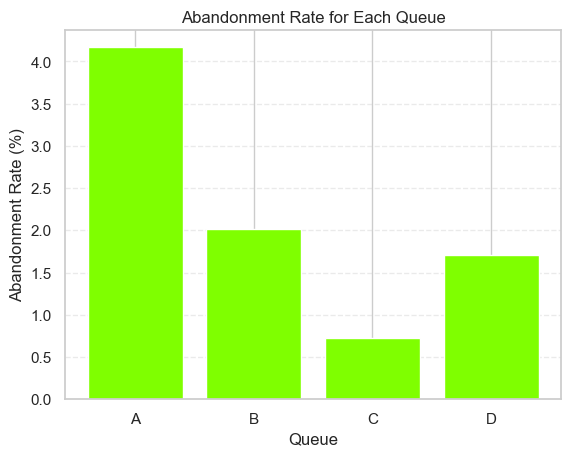

In [55]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import matplotlib.pyplot as plt
import seaborn as sns

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i]) *100 #The code was missing *100 to make it a percent, so I added it.


#Your code below:
xdata = queues
ydata = list(abandonment_rates.values())

fig, ax = plt.subplots()
ax.bar(xdata, ydata, color="chartreuse") #Wanted  to see if chartreuse was in the colors. It is!
ax.set(xlabel= "Queue", ylabel="Abandonment Rate (%)", title='Abandonment Rate for Each Queue')
ax.grid(True, which='major', axis='y', linestyle='--', alpha = .4) #I thought it looked better with grids and wanted to learn how to do them, so I researched and found .grid and read the documentation!
plt.show()

##### Record your answer below:

> Chart style you chose and why: I chose a vertical bar charts, since we are comparing the different queues and they have total amounts. This allows easy comparison of the different queue abandonment rates.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

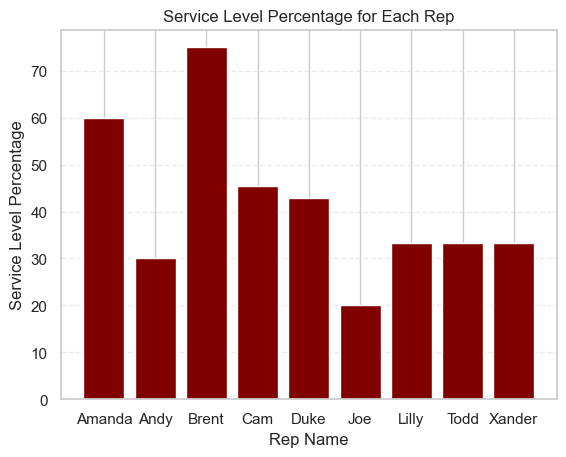

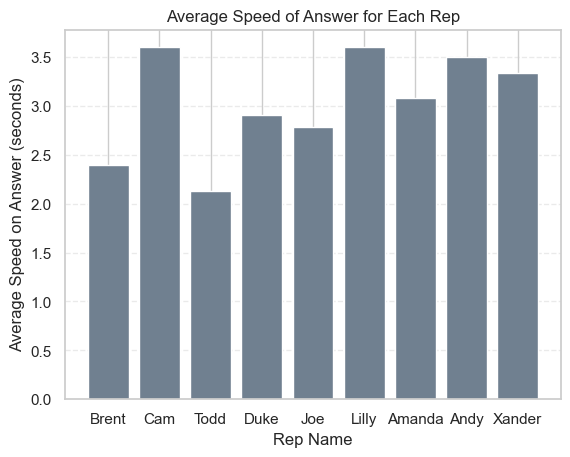

In [56]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index() 

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100


#Your Code Here:
reps_sl = service_level.index #Gives names of reps for axis labels. I first tried pulling this from the df with unique, but it gave them in the wrong order.
reps_as = quick_reps["Rep ID"].unique()
service_level_percentage = service_level["Service Level %"]
average_speed_of_answer = north_plt["Incoming Wait Time"]

xdata= reps_sl
ydata = service_level_percentage

fig, ax = plt.subplots()
ax.bar(xdata, ydata, color='maroon') #Looked up the default colors at https://matplotlib.org/stable/users/explain/colors/colors.html
ax.set(xlabel= "Rep Name", ylabel="Service Level Percentage", title='Service Level Percentage for Each Rep')
ax.grid(True, which='major', axis='y', linestyle='--', alpha = .4) #I thought it looked better with grids and wanted to learn how to do them, so I researched and found .grid and read the documentation!
plt.show() #I tried ax.show, but there is no attribute, but I think this works, because ax is linked to plt.

x2data = reps_as
y2data = average_speed_of_answer

fig, ax = plt.subplots()
ax.bar(x2data, y2data, color='slategrey') #Looked up the default colors at https://matplotlib.org/stable/users/explain/colors/colors.html
ax.set(xlabel= "Rep Name", ylabel="Average Speed on Answer (seconds)", title='Average Speed of Answer for Each Rep')
ax.grid(True, which='major', axis='y', linestyle='--', alpha = .4) #I thought it looked better with grids and wanted to learn how to do them, so I researched and found .grid and read the documentation!
plt.show() #I tried ax.show, but there is no attribute, but I think this works, because ax is linked to plt.



##### Record your answer below:

> Chart style you chose and why: 

I chose bar charts for both the Average Answer Speed and service percentage level, since we are comparing the reps under the same category of data and it allows for an easy to see comparison.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

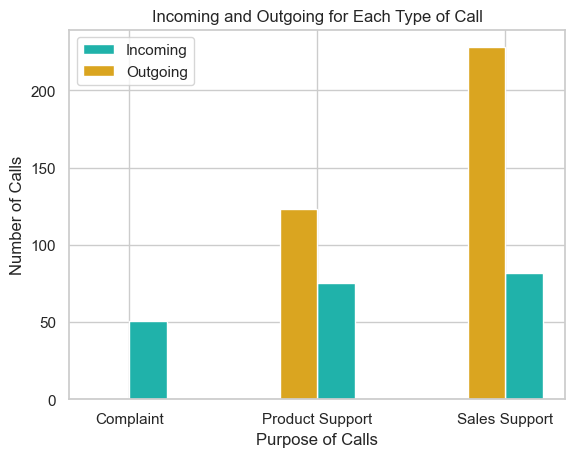

In [57]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need


purpose_group = df.groupby("Call Purpose") # Grouping by purpose.
call_purpose = ["Complaint", "Product Support", "Sales Support"] #Making list  of name of call purpose - I can use it for graph labels
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts() #Counts unique vales in a series.

complaints = purpose_counts["Complaint"].to_dict() #Makes a complaint dictionary.
sales_support = purpose_counts["Sales Support"].to_dict() #Makes a Sales Support Dictionary.
product_support = purpose_counts["Product Support"].to_dict() #Makes a Product Support Dictionary.

#Your Code Here:
#Below to convert Dict to values and keys
#I needed to make lists for each incoming and outgoing. I set as 0 if there is no value to make sure everything has a value for plotting.

complaint_income = complaints.get("Incoming", 0)
complaint_outgo = complaints.get("Outgoing", 0)
sales_income = sales_support.get("Incoming", 0)
sales_outgo = sales_support.get("Outgoing", 0)
product_income = product_support.get("Incoming", 0)
product_outgo = product_support.get("Outgoing", 0)

incoming = [complaint_income, sales_income, product_income]
outgoing = [complaint_outgo, sales_outgo, product_outgo]

x = np.arange(len(call_purpose)) #This will evenly arrange the bars based on the number of items in call_purpose
width = 0.2


#The below makes the grouped bar chart.
plt.bar(x+ (width/2), incoming, width, color='lightseagreen', label='Incoming') #got colors from https://matplotlib.org/stable/gallery/color/named_colors.html
plt.bar(x- (width/2), outgoing, width, color='goldenrod', label = 'Outgoing')
plt.xticks(x, call_purpose)
plt.xlabel("Purpose of Calls")
plt.ylabel("Number of Calls")
plt.title("Incoming and Outgoing for Each Type of Call")
plt.legend()
plt.show()



##### Record your answer below:

> Chart style you chose and why:  I chose a group chart since we are compaing categories of purpose of calls and there are two types of calls. This allows someone to see the different amounts more easily. If I had more time, I'd probably add values to the columns, but I wasn't sure how and did not have the time to learn today.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: 

To help myself answer:

North:
abandonment = 2.86% (They want 2-5%)
service = 40.24% with 33 ideal timed calls
average speed = 3.05s
Employee # = 9
Total Calls = 245
Calls per capita = 27.22

South:
abandonment = 1.27% (They want 2-5%)
service = 38.10% with 48 ideal timed calls
average speed = 3.00s
Employee # = 11
Total Calls = 314
Calls per capita = 28.5
--------------------------------------

Based on the data above the North Branch appears to be operating more efficiently. Their abandonment rate is within the 2-5%, they have a higer service percent, and they are close to the same average speed of the South Branch. The South Branch is not within the ideal abandonement rate, they have a lower service percent, though they do have a slightly quicker average speed, but not by much - however, they have more employees.




#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: 
I would first look at other factors such as management style, specific employees, and how the different branches do things differently, however if told to hire someone else I would send them to the North Branch. The North Branch is more efficient and one employee will be more efficient there. The South branch already has an adequate number of employees, since there call per capita is not much different than the North branch.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: 
I would want to look at data by employee to see if any employees are outliers in either a positive or negative manner and perhaps have the employees that are suceeding help with training new employees and look what things can be changed with the less efficient employees.

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why:      
Grouped Bar Chart, since it is comparing data across different groups.

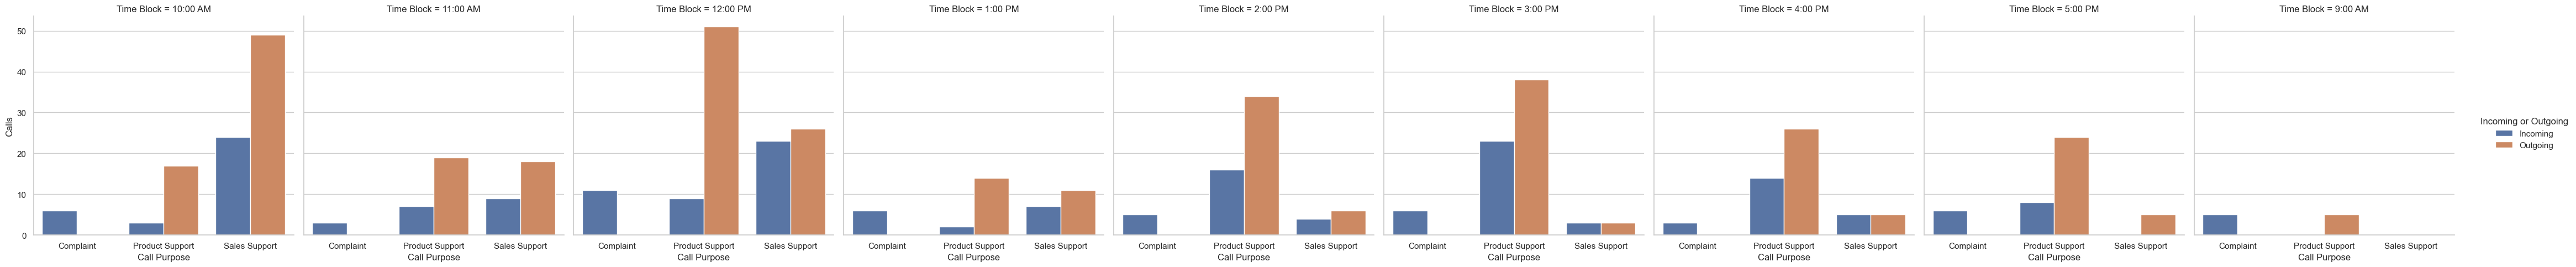

In [58]:
"""Need this data:
Time Blocks
call purposes for each time block
number of incoming and outgoing for each call purpose for each time block
"""
#I tried to do this for a long time in matplotpoly and found out it is much easier in Seaborn, so I did it in Seaborn instead!!!!


# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
call_times_groups = call_times.groupby(["Time Block", "Call Purpose", "Incoming or Outgoing"]).sum("Calls")


sns.set_theme(style="whitegrid")

graph = sns.catplot( data=call_times_groups, kind="bar", x="Call Purpose", y="Calls", hue="Incoming or Outgoing", col="Time Block")